In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hardcoded results directly into a DataFrame
rows = [
    # Model, Split, Hidden, Params, HR10, HR10_se, NDCG10, NDCG10_se, MRR, MRR_se, Time
    ("BERT4Rec","100K",32,273811,0.1273,0.0084,0.0620,0.0044,0.0425,0.0042,7.0),
    ("BERT4Rec","100K",64,275859,0.1217,0.0091,0.0582,0.0056,0.0392,0.0050,7.1),
    ("BERT4Rec","100K",128,279955,0.1202,0.0097,0.0584,0.0042,0.0399,0.0035,7.2),
    ("BERT4Rec","1M",32,1370875,0.2766,0.0149,0.1573,0.0103,0.1209,0.0088,95.4),
    ("BERT4Rec","1M",64,1374971,0.2752,0.0155,0.1550,0.0106,0.1184,0.0090,95.2),
    ("BERT4Rec","1M",128,1383163,0.2777,0.0174,0.1568,0.0110,0.1200,0.0092,101.3),
    ("BERT4Rec","10M",32,8712886,0.3112,0.0,0.1494,0.0,0.1874,0.0,1347.8),
    ("BERT4Rec","10M",64,8721078,0.2744,0.0,0.1232,0.0,0.1585,0.0,1072.7),
    ("BERT4Rec","10M",128,8737462,0.3171,0.0,0.1513,0.0,0.1902,0.0,2129.6),
    ("BERT4Rec","Musik4All",32,13600220,0.3565,0.0,0.2626,0.0,0.2332,0.0,236.0),
    ("BERT4Rec","Musik4All",64,13604316,0.3653,0.0,0.2668,0.0,0.2362,0.0,245.8),
    ("BERT4Rec","Musik4All",128,13612508,0.3644,0.0,0.2720,0.0,0.2431,0.0,276.9),
    ("BERT4Rec","Amazon Software",32,5985824,0.1020,0.0,0.0732,0.0,0.0643,0.0,1.5),
    ("BERT4Rec","Amazon Software",64,5989920,0.1008,0.0,0.0712,0.0,0.0620,0.0,1.5),
    ("BERT4Rec","Amazon Software",128,5998112,0.0985,0.0,0.0692,0.0,0.0601,0.0,1.7),

    ("SAS4Rec","100K",32,269139,0.1278,0.0098,0.0623,0.0038,0.0427,0.0028,5.9),
    ("SAS4Rec","100K",64,271187,0.1247,0.0106,0.0606,0.0059,0.0414,0.0051,6.0),
    ("SAS4Rec","100K",128,275283,0.1283,0.0106,0.0615,0.0056,0.0415,0.0044,6.0),
    ("SAS4Rec","1M",32,1353339,0.2109,0.0120,0.1191,0.0083,0.0912,0.0072,82.2),
    ("SAS4Rec","1M",64,1357435,0.1427,0.0072,0.0798,0.0053,0.0606,0.0047,82.3),
    ("SAS4Rec","1M",128,1365627,0.0835,0.0048,0.0461,0.0032,0.0347,0.0027,89.9),
    ("SAS4Rec","10M",32,8645046,0.2143,0.0,0.1246,0.0,0.0972,0.0,674.7),
    ("SAS4Rec","10M",64,8653238,0.1271,0.0,0.0713,0.0,0.0544,0.0,1170.4),
    ("SAS4Rec","10M",128,8669622,0.0727,0.0,0.0400,0.0,0.0301,0.0,2372.6),
    ("SAS4Rec","Musik4All",32,13582427,0.3280,0.0,0.2397,0.0,0.2122,0.0,232.9),
    ("SAS4Rec","Musik4All",64,13586523,0.3087,0.0,0.2285,0.0,0.2036,0.0,254.3),
    ("SAS4Rec","Musik4All",128,13594715,0.2815,0.0,0.2107,0.0,0.1886,0.0,242.9),
    ("SAS4Rec","Amazon Software",32,5968288,0.0050,0.0,0.0019,0.0,0.0009,0.0,1.3),
    ("SAS4Rec","Amazon Software",64,5972384,0.0050,0.0,0.0019,0.0,0.0009,0.0,1.3),
    ("SAS4Rec","Amazon Software",128,5980576,0.0050,0.0,0.0019,0.0,0.0009,0.0,1.7),

    ("xLSTM","100K",32,269188,0.1041,0.0070,0.0509,0.0036,0.0350,0.0029,9.6),
    ("xLSTM","100K",64,269188,0.1057,0.0083,0.0522,0.0050,0.0361,0.0046,10.0),
    ("xLSTM","100K",128,269188,0.1036,0.0095,0.0511,0.0044,0.0355,0.0038,10.3),
    ("xLSTM","1M",32,1376904,0.2625,0.0146,0.1492,0.0102,0.1148,0.0089,143.1),
    ("xLSTM","1M",64,1376904,0.2603,0.0151,0.1483,0.0104,0.1143,0.0089,147.0),
    ("xLSTM","1M",128,1376904,0.2605,0.0155,0.1479,0.0107,0.1136,0.0092,164.2),
    ("xLSTM","10M",32,8698176,0.3138,0.0,0.1910,0.0,0.1533,0.0,1218.7),
    ("xLSTM","10M",64,8698176,0.3216,0.0,0.1962,0.0,0.1577,0.0,2208.3),
    ("xLSTM","10M",128,8698176,0.3183,0.0,0.1937,0.0,0.1555,0.0,4239.2),
    ("xLSTM","Musik4All",32,13558664,0.3496,0.0,0.2591,0.0,0.2309,0.0,701.5),
    ("xLSTM","Musik4All",64,13558664,0.3439,0.0,0.2568,0.0,0.2296,0.0,1101.2),
    ("xLSTM","Musik4All",128,13558664,0.3505,0.0,0.2605,0.0,0.2324,0.0,1851.4),
    ("xLSTM","Amazon Software",32,5973896,0.0829,0.0,0.0600,0.0,0.0528,0.0,4.1),
    ("xLSTM","Amazon Software",64,5973896,0.0842,0.0,0.0598,0.0,0.0523,0.0,6.7),
    ("xLSTM","Amazon Software",128,5973896,0.0846,0.0,0.0619,0.0,0.0548,0.0,12.1),
]

df = pd.DataFrame(rows, columns=[
    "Model","Split","Hidden","Params","HR10","HR10_se","NDCG10","NDCG10_se","MRR","MRR_se","Time"
])

df.head()


,Model,Split,Hidden,Params,HR10,HR10_se,NDCG10,NDCG10_se,MRR,MRR_se,Time
0,BERT4Rec,100K,32,273811,0.1273,0.0084,0.0620,0.0044,0.0425,0.0042,7.0
1,BERT4Rec,100K,64,275859,0.1217,0.0091,0.0582,0.0056,0.0392,0.0050,7.1
2,BERT4Rec,100K,128,279955,0.1202,0.0097,0.0584,0.0042,0.0399,0.0035,7.2
3,BERT4Rec,1M,32,1370875,0.2766,0.0149,0.1573,0.0103,0.1209,0.0088,95.4
4,BERT4Rec,1M,64,1374971,0.2752,0.0155,0.1550,0.0106,0.1184,0.0090,95.2


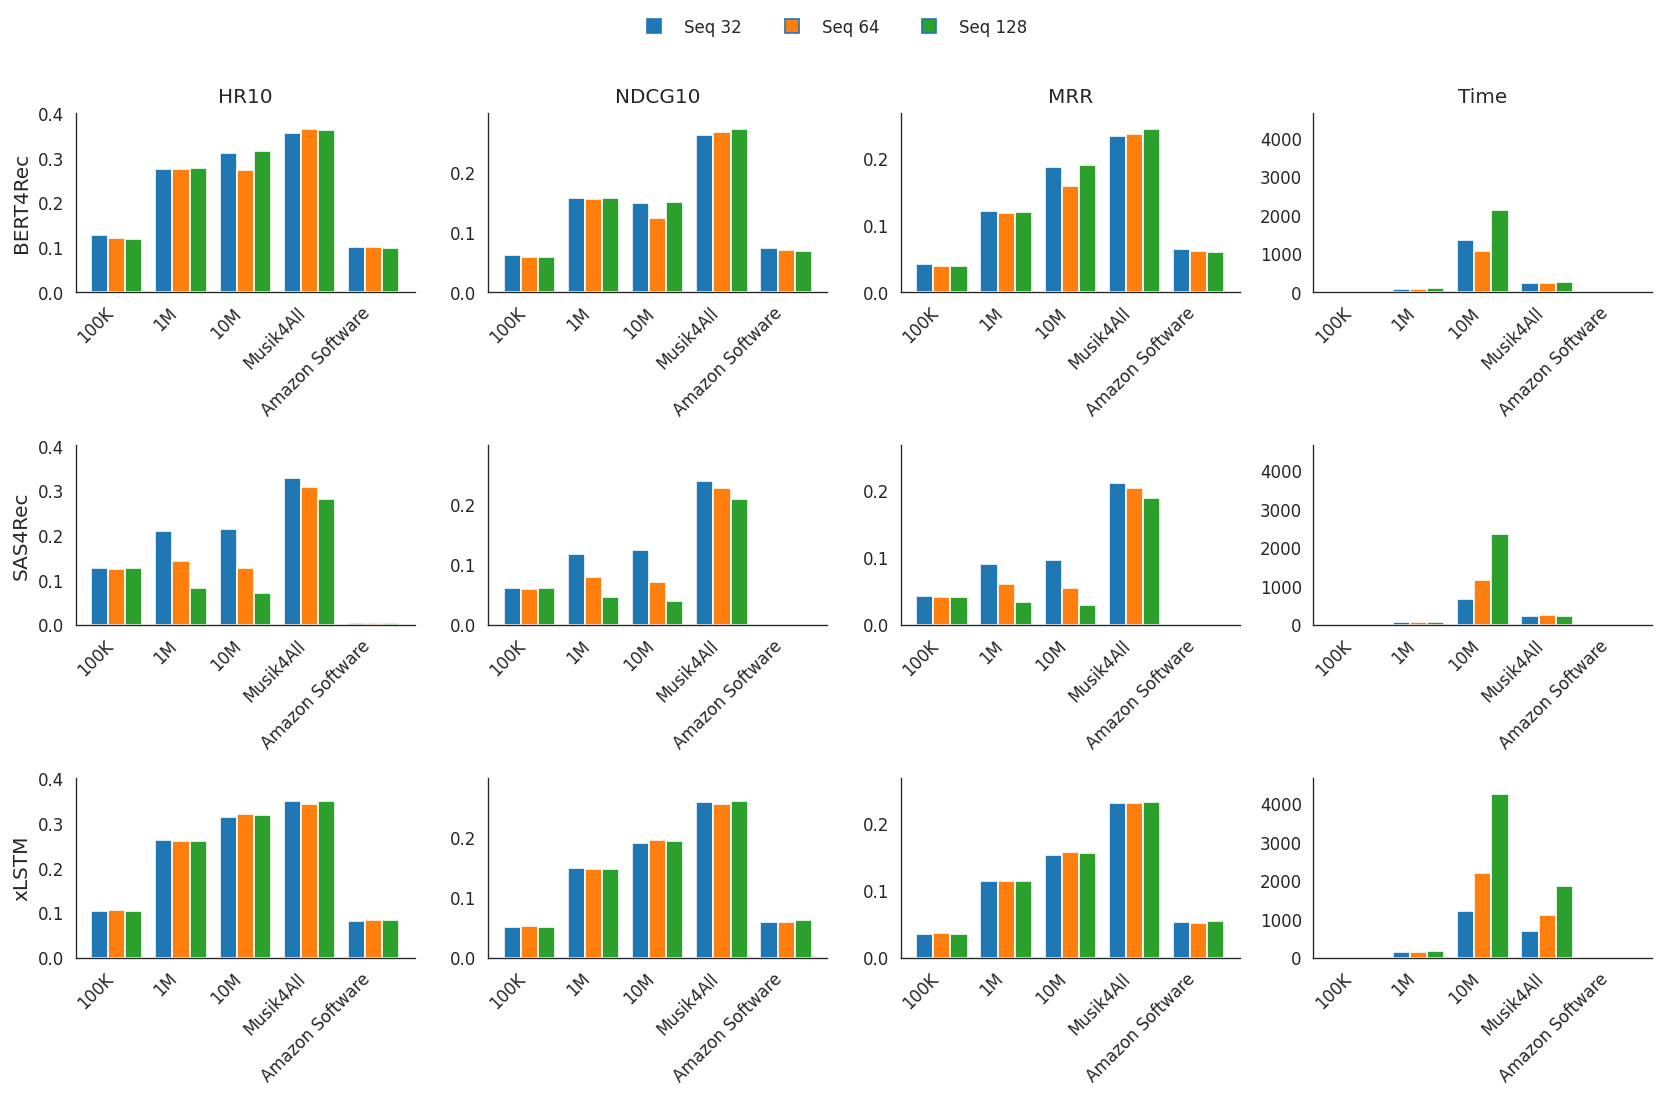

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Config ---
metrics = ["HR10", "NDCG10", "MRR", "Time"]
splits  = ["100K", "1M", "10M", "Musik4All", "Amazon Software"]   # x-axis order
seq_levels = sorted(df["Hidden"].unique())                         # sequence lengths (from 'Hidden')
models  = list(df["Model"].unique())

# Style (clean, no grids)
plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# Colors by sequence length (consistent across all subplots)
cmap = plt.get_cmap("tab10")
# Use the palette list if available; otherwise sample the cmap
palette = getattr(cmap, "colors", [cmap(i) for i in np.linspace(0, 1, 10)])
seq_colors = {h: palette[i % len(palette)] for i, h in enumerate(seq_levels)}

# Consistent y-limits per metric column (start at 0)
col_max = {m: float(df[m].max()) for m in metrics}
col_max = {m: (0.0, col_max[m] * 1.10 if col_max[m] > 0 else 1.0) for m in metrics}

fig, axes = plt.subplots(len(models), len(metrics), figsize=(14, 9), sharex=False)

# Legend handles (one global legend)
legend_handles = [
    plt.Line2D([0],[0], marker='s', linestyle='None', markersize=8,
               markerfacecolor=seq_colors[h], label=f"Seq {h}")
    for h in seq_levels
]

for i, model in enumerate(models):
    df_m = df[df["Model"] == model]

    for j, metric in enumerate(metrics):
        ax = axes[i, j]

        # Pivot: rows = Split, cols = Hidden (seq length), values = metric
        pivot = (df_m.pivot_table(index="Split", columns="Hidden", values=metric, aggfunc="mean")
                        .reindex(index=splits, columns=seq_levels))

        # Grouped bars: one group per split, bars = seq lengths
        n_groups = len(splits)
        n_bars   = len(seq_levels)
        x = np.arange(n_groups)
        width = 0.8 / max(n_bars, 1)

        for k, h in enumerate(seq_levels):
            vals = pivot[h].values
            ax.bar(x + (k - (n_bars-1)/2)*width, vals, width=width,
                   color=seq_colors[h], label=f"Seq {h}")

        # Titles & labels
        if i == 0:
            ax.set_title(metric)
        if j == 0:
            ax.set_ylabel(model)
        else:
            ax.set_ylabel("")

        ax.set_xticks(x)
        ax.set_xticklabels(splits, rotation=45, ha="right")

        # Consistent column y-limits & no grid
        ax.set_ylim(*col_max[metric])
        ax.grid(False)

# Single legend (top center)
fig.legend(handles=legend_handles, loc="upper center", ncol=len(seq_levels),
           frameon=False, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.savefig("bargrid_by_dataset_with_seq.png", bbox_inches="tight")
plt.savefig("bargrid_by_dataset_with_seq.pdf", bbox_inches="tight")
plt.show()

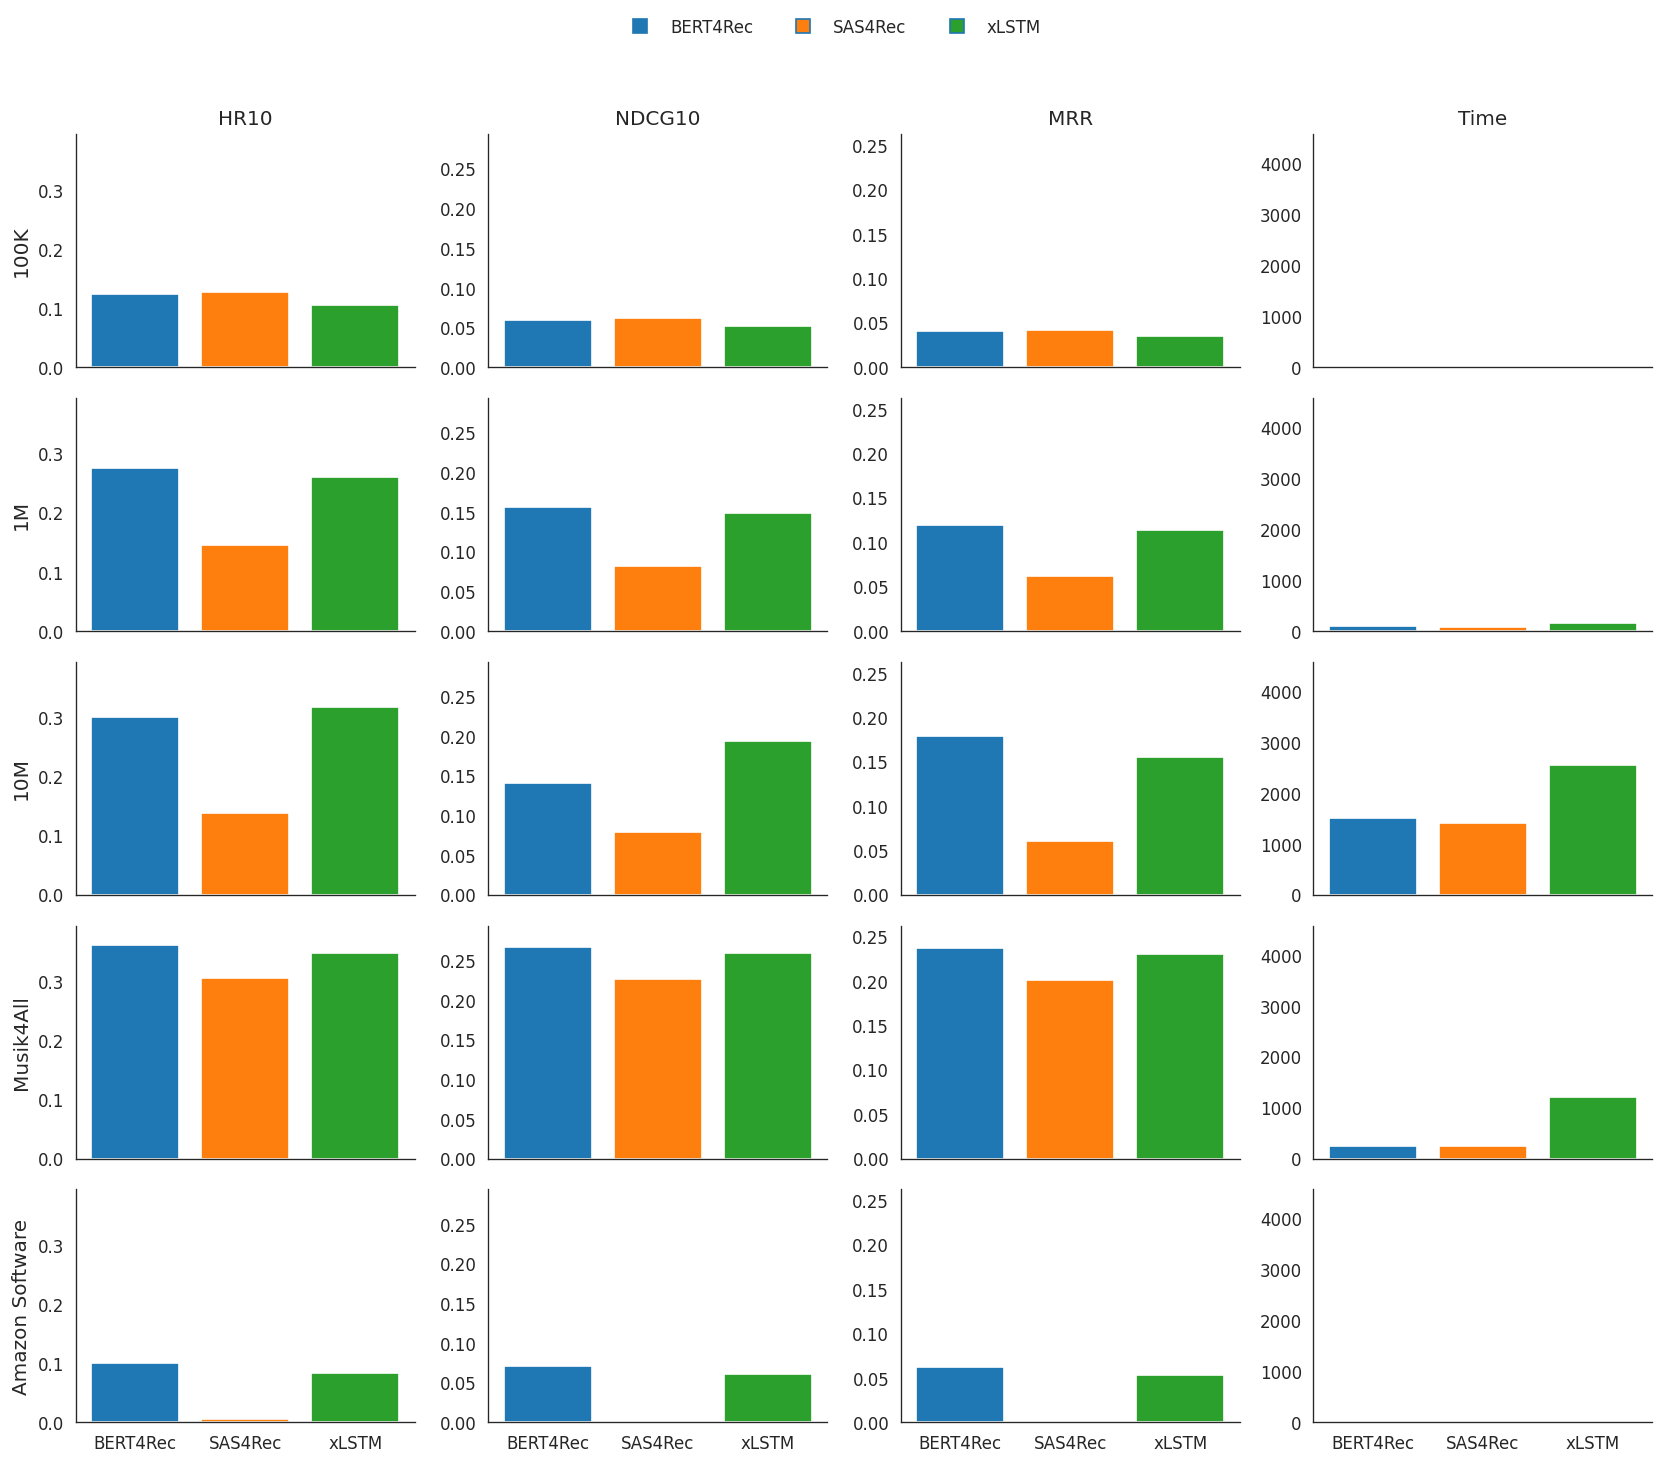

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Config ---
metrics = ["HR10", "NDCG10", "MRR", "Time"]
splits  = ["100K", "1M", "10M", "Musik4All", "Amazon Software"]
models  = ["BERT4Rec", "SAS4Rec", "xLSTM"]  # fixed order for consistency
agg_fun = "mean"  # or "max"

# NeurIPS-ish: clean, no grids
plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# Colors by model (consistent across all subplots)
tab10 = plt.get_cmap("tab10")
model_colors = {m: tab10(i % 10) for i, m in enumerate(models)}

# Precompute y-limits per metric for consistent scaling across rows
col_lims = {}
for met in metrics:
    vals = df[met].values.astype(float)
    vmin, vmax = np.nanmin(vals), np.nanmax(vals)
    pad = (vmax - vmin) * 0.08 if vmax > vmin else 0.02
    col_lims[met] = (max(0.0, vmin - pad), vmax + pad)

fig, axes = plt.subplots(len(splits), len(metrics), figsize=(14, 12), sharex=False)

# Build legend handles once
legend_handles = [
    plt.Line2D([0], [0], marker='s', linestyle='None', markersize=8,
               markerfacecolor=model_colors[m], label=m)
    for m in models
]

for i, split in enumerate(splits):
    df_split = df[df["Split"] == split]
    # aggregate over Hidden per model
    if agg_fun == "mean":
        g = df_split.groupby("Model").mean(numeric_only=True)
    else:
        g = df_split.groupby("Model").max(numeric_only=True)
    # ensure rows for all models in fixed order
    g = g.reindex(models)

    for j, met in enumerate(metrics):
        ax = axes[i, j]
        vals = g[met].values
        x = np.arange(len(models))
        colors = [model_colors[m] for m in models]

        ax.bar(x, vals, color=colors)
        ax.set_ylim(*col_lims[met])

        # x ticks = models only on bottom row to reduce clutter
        if i == len(splits) - 1:
            ax.set_xticks(x)
            ax.set_xticklabels(models, rotation=0)
        else:
            ax.set_xticks(x)
            ax.set_xticklabels([""] * len(models))

        # Titles (top row) and row labels (left col)
        if i == 0:
            ax.set_title(met)
        if j == 0:
            ax.set_ylabel(split)
        else:
            ax.set_ylabel("")

        # No gridlines
        ax.grid(False)

# Global legend (top center)
fig.legend(handles=legend_handles, loc="upper center",
           ncol=len(models), frameon=False, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.savefig("bargrid_by_dataset_models.png", bbox_inches="tight")
plt.savefig("bargrid_by_dataset_models.pdf", bbox_inches="tight")
plt.show()


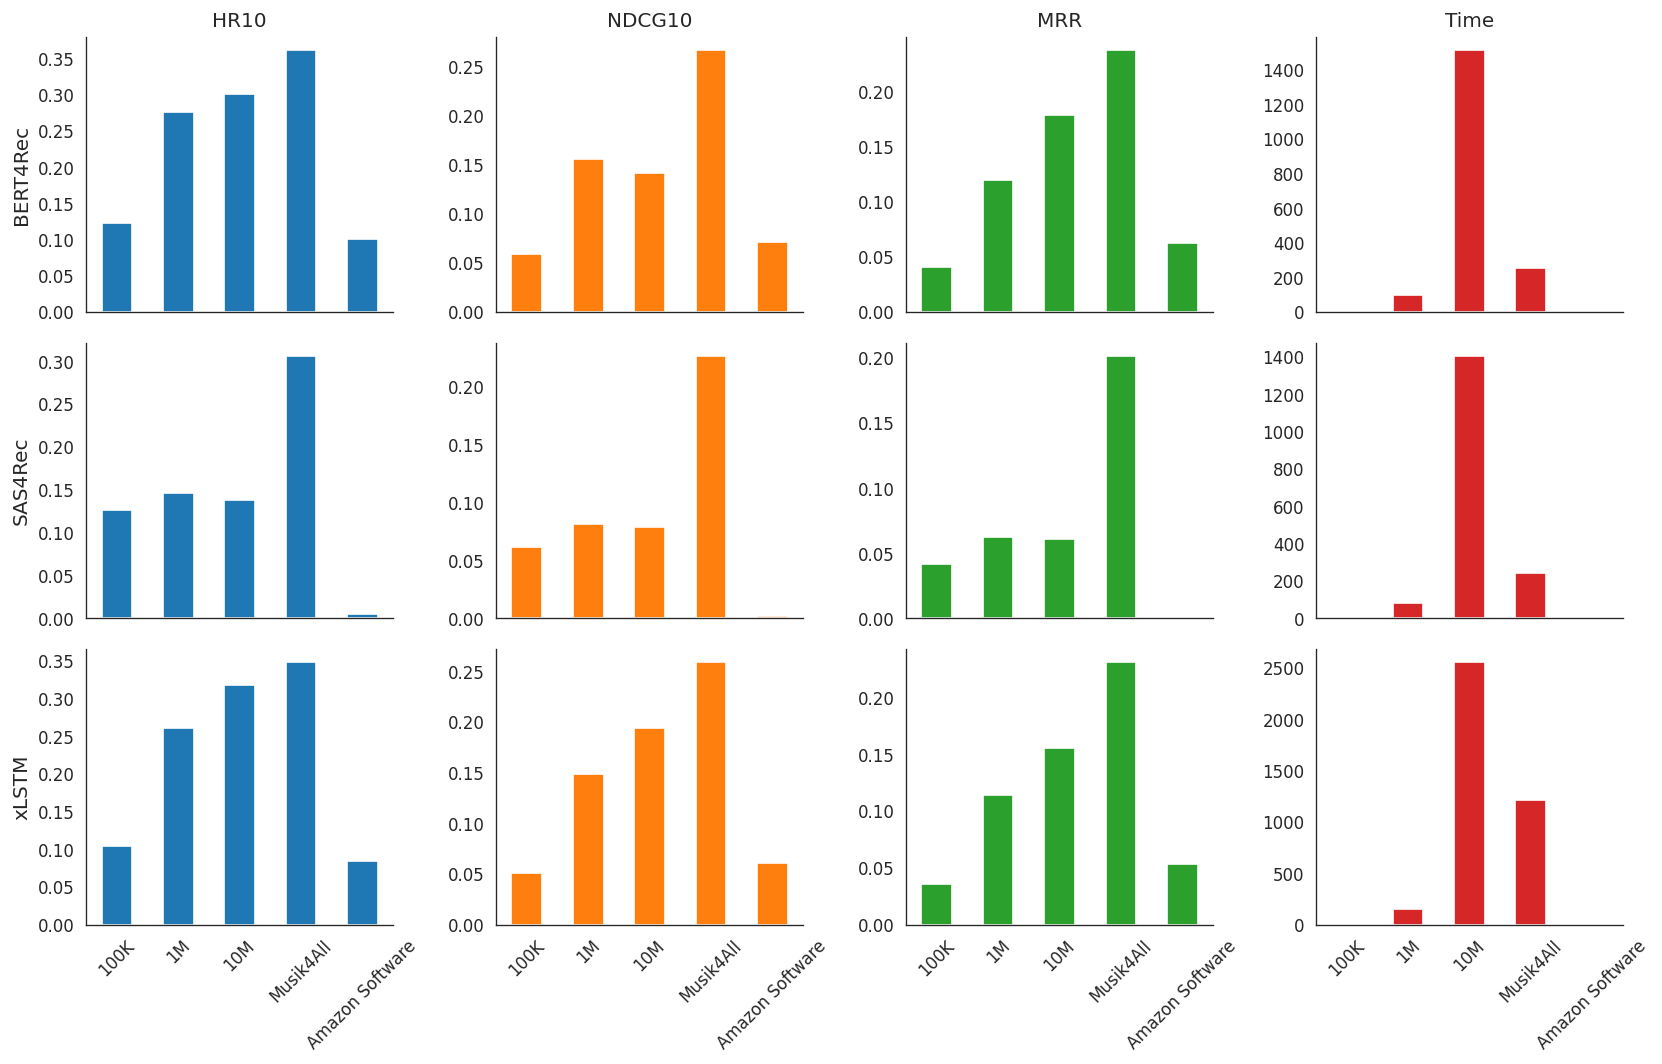

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics to plot
metrics = ["HR10", "NDCG10", "MRR", "Time"]
splits = ["100K", "1M", "10M", "Musik4All", "Amazon Software"]

# Clean NeurIPS-style (no grid lines)
sns.set_style("white")
plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "lines.linewidth": 2,
})

models = df["Model"].unique()
fig, axes = plt.subplots(len(models), len(metrics), figsize=(14, 9), sharex=True)

for i, model in enumerate(models):
    df_model = df[df["Model"] == model]
    for j, metric in enumerate(metrics):
        ax = axes[i, j]

        # Group by Split and average across Hidden
        grouped = df_model.groupby("Split")[metric].mean().reindex(splits)

        grouped.plot(kind="bar", ax=ax, color=sns.color_palette("tab10")[j])

        ax.set_title(metric if i == 0 else "")
        if j == 0:
            ax.set_ylabel(model)
        else:
            ax.set_ylabel("")

        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)

        # Remove gridlines & top/right spines
        ax.grid(False)
        sns.despine(ax=ax)

plt.tight_layout()

# Save as both PNG (for quick viewing) and PDF (for LaTeX/NeurIPS paper)
plt.savefig("results_bar_grid.png", bbox_inches="tight")
plt.savefig("results_bar_grid.pdf", bbox_inches="tight")

plt.show()


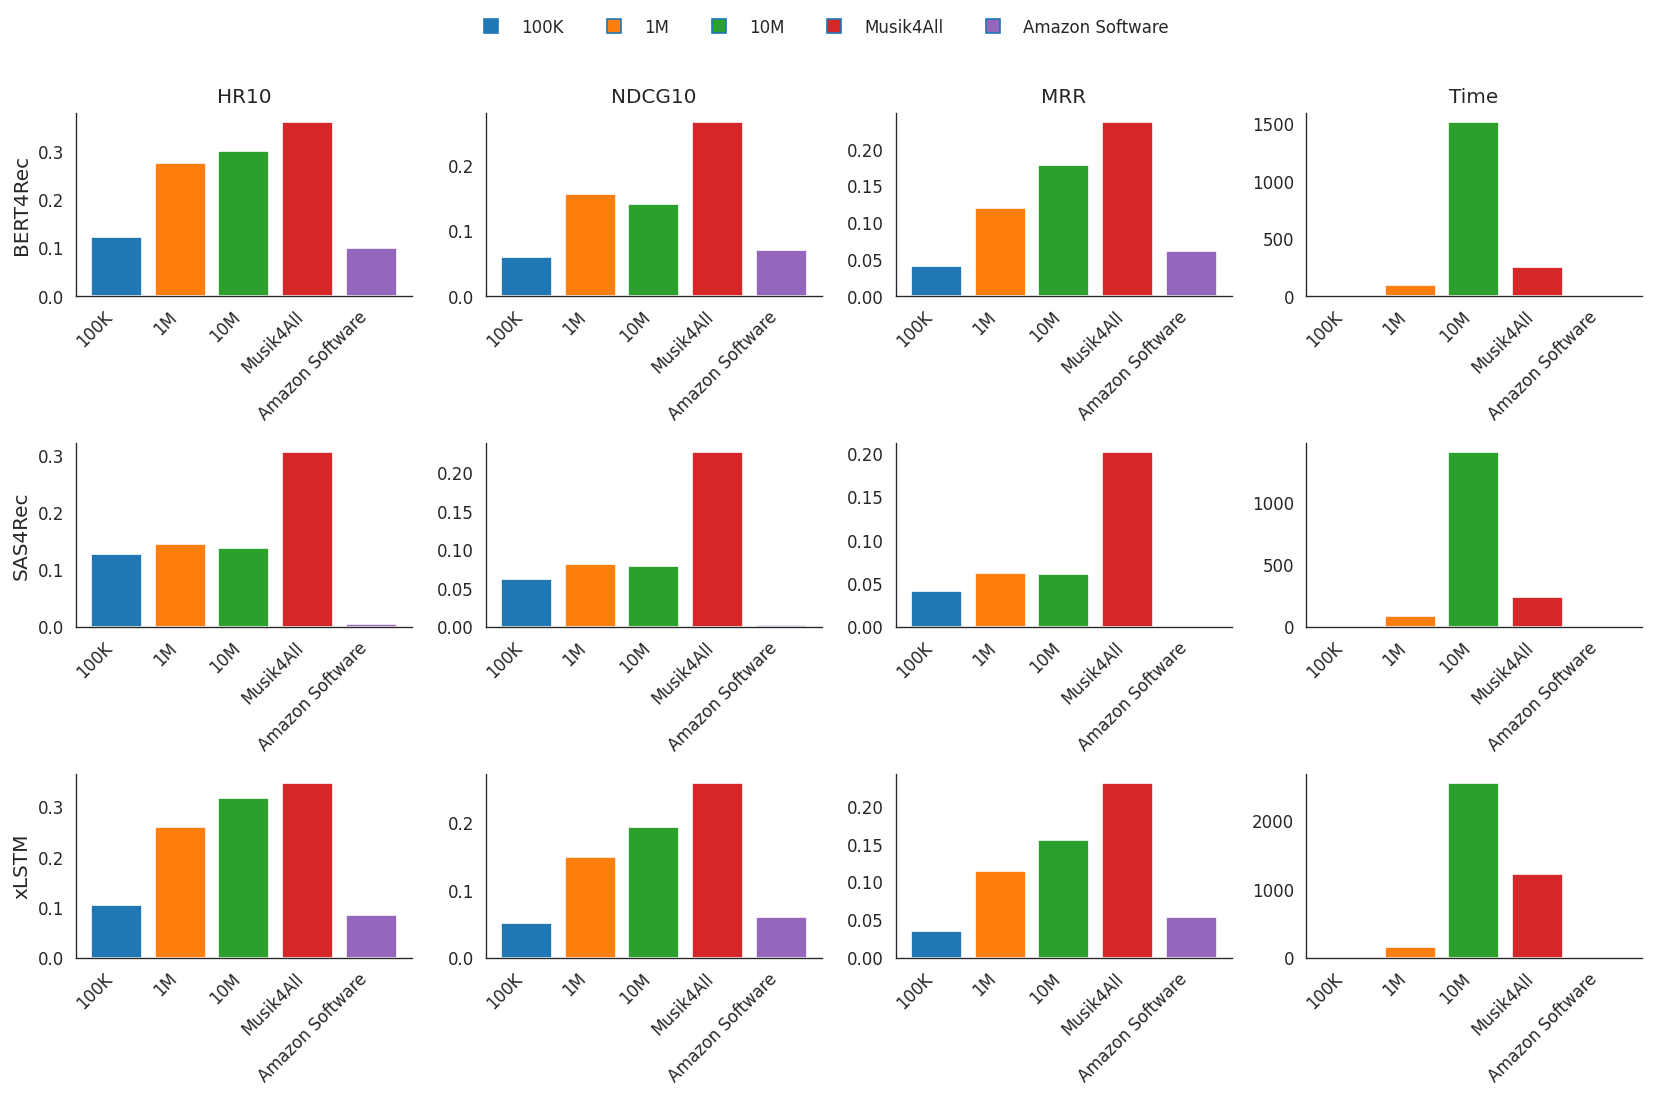

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----- Config -----
metrics = ["HR10", "NDCG10", "MRR", "Time"]
splits  = ["100K", "1M", "10M", "Musik4All", "Amazon Software"]  # desired x-axis order
models  = list(df["Model"].unique())  # assumes 3 models
agg_fun = "mean"   # choose "mean" or "max" over Hidden if multiple rows per split

# Matplotlib "NeurIPS-ish" style (no grids)
plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# Consistent colors per split
tab10 = plt.get_cmap("tab10")
split_colors = {s: tab10(i % 10) for i, s in enumerate(splits)}

fig, axes = plt.subplots(len(models), len(metrics), figsize=(14, 9), sharex=False)

# Build a single legend handle set (one legend for whole figure)
legend_handles = []
for s in splits:
    patch = plt.Line2D([0], [0], marker='s', linestyle='None', markersize=8, markerfacecolor=split_colors[s], label=s)
    legend_handles.append(patch)

for i, model in enumerate(models):
    df_model = df[df["Model"] == model].copy()

    # aggregate over Hidden per split
    if agg_fun == "mean":
        agg = df_model.groupby("Split").mean(numeric_only=True)
    else:
        agg = df_model.groupby("Split").max(numeric_only=True)

    # reindex to keep split order; missing -> np.nan (will just not draw bars)
    agg = agg.reindex(splits)

    for j, metric in enumerate(metrics):
        ax = axes[i, j] if len(models) > 1 else axes[j]

        values = agg[metric].values
        x = np.arange(len(splits))

        # Colors by split
        colors = [split_colors[s] for s in splits]

        ax.bar(x, values, color=colors)

        # Titles/y-labels
        if i == 0:
            ax.set_title(metric)
        if j == 0:
            ax.set_ylabel(model)
        else:
            ax.set_ylabel("")

        ax.set_xticks(x)
        ax.set_xticklabels(splits, rotation=45, ha="right")

        # No grid lines
        ax.grid(False)

# Single legend at top center
fig.legend(handles=legend_handles, loc="upper center", ncol=len(splits), frameon=False, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=(0, 0, 1, 0.96))

# Save both PNG and PDF
plt.savefig("bargrid_by_split.png", bbox_inches="tight")
plt.savefig("bargrid_by_split.pdf", bbox_inches="tight")

plt.show()


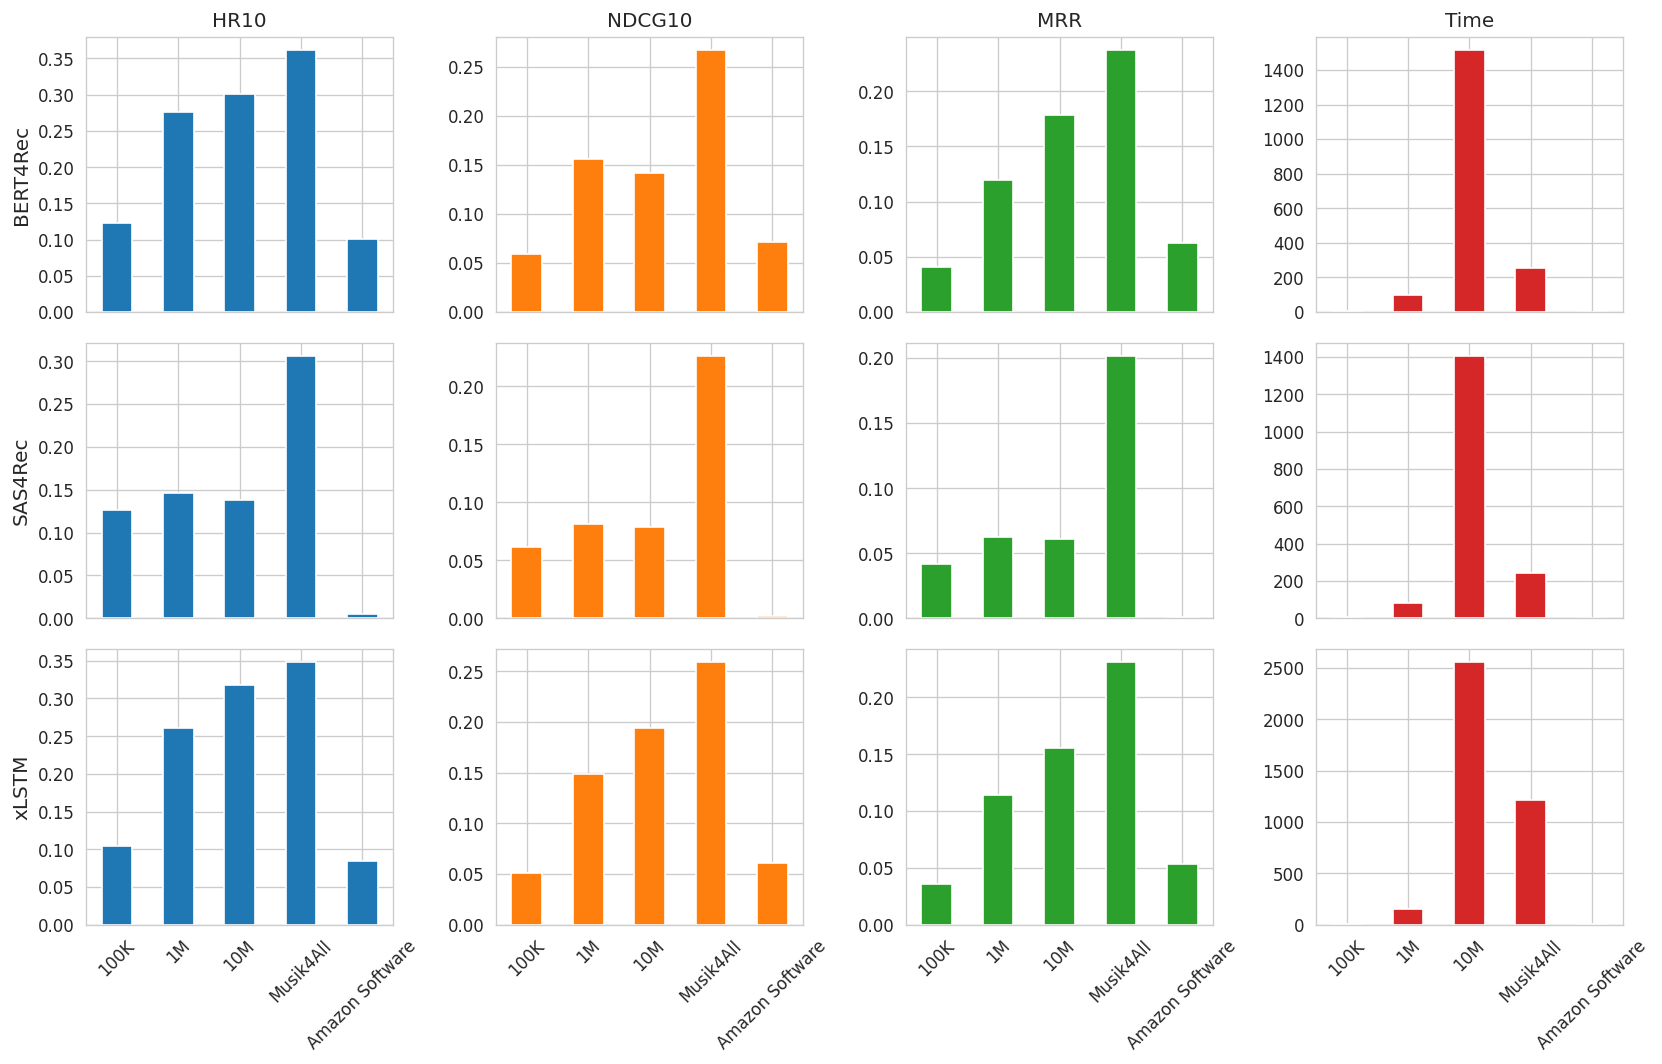

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics to plot
metrics = ["HR10", "NDCG10", "MRR", "Time"]
splits = ["100K", "1M", "10M", "Musik4All", "Amazon Software"]

# Style for NeurIPS format
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "lines.linewidth": 2,
})

models = df["Model"].unique()
fig, axes = plt.subplots(len(models), len(metrics), figsize=(14, 9), sharex=True)

for i, model in enumerate(models):
    df_model = df[df["Model"] == model]
    for j, metric in enumerate(metrics):
        ax = axes[i, j]

        # Group by Split and average (in case of multiple hidden sizes)
        grouped = df_model.groupby("Split")[metric].mean().reindex(splits)

        grouped.plot(kind="bar", ax=ax, color=sns.color_palette("tab10")[j])

        ax.set_title(metric if i == 0 else "")
        if j == 0:
            ax.set_ylabel(model)
        else:
            ax.set_ylabel("")

        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

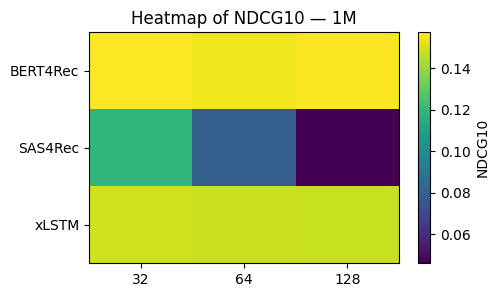

In [ ]:
split = "1M"  # change as needed
metric = "NDCG10"
m = metric

pivot = df[df["Split"]==split].pivot_table(index="Model", columns="Hidden", values=m)

plt.figure(figsize=(5,3))
plt.imshow(pivot.values, aspect="auto")
plt.colorbar(label=metric)
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title(f"Heatmap of {metric} — {split}")
plt.show()


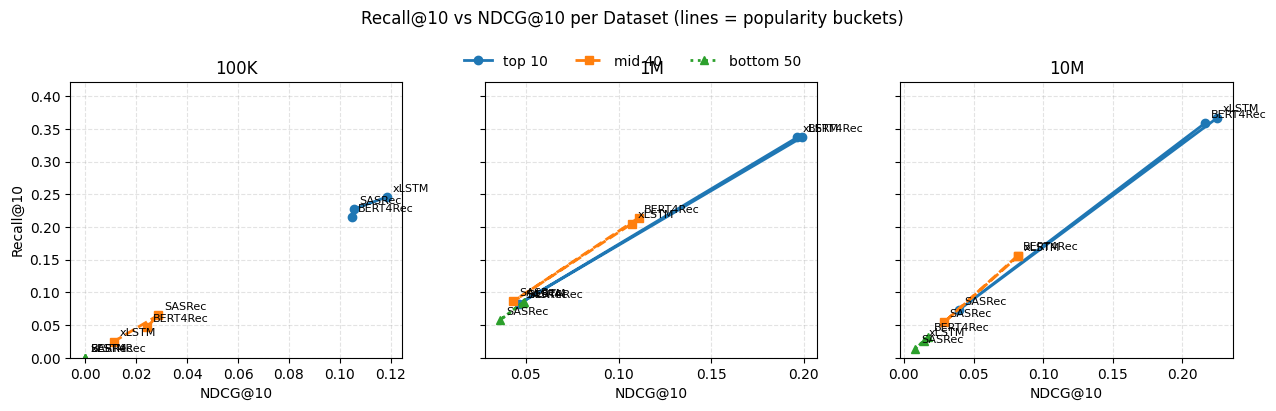

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------------- choose metrics ----------------
PRIMARY_METRIC = "Recall@10"
SECOND_METRIC  = None

# ---------------- table data ----------------
rows = [
    # BERT4Rec
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2150,"MRR@10":0.0714,"NDCG@10":0.1048},
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0471,"MRR@10":0.0176,"NDCG@10":0.0243},
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3373,"MRR@10":0.1568,"NDCG@10":0.1991},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2139,"MRR@10":0.0797,"NDCG@10":0.1108},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0839,"MRR@10":0.0376,"NDCG@10":0.0482},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3589,"MRR@10":0.1728,"NDCG@10":0.2165},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1562,"MRR@10":0.0594,"NDCG@10":0.0818},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0321,"MRR@10":0.0128,"NDCG@10":0.0172},
    # SASRec
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2272,"MRR@10":0.0689,"NDCG@10":0.1055},
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0651,"MRR@10":0.0178,"NDCG@10":0.0287},
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0828,"MRR@10":0.0354,"NDCG@10":0.0465},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0863,"MRR@10":0.0303,"NDCG@10":0.0433},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0579,"MRR@10":0.0298,"NDCG@10":0.0362},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0730,"MRR@10":0.0293,"NDCG@10":0.0394},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0541,"MRR@10":0.0211,"NDCG@10":0.0288},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0138,"MRR@10":0.0066,"NDCG@10":0.0083},
    # xLSTM
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2460,"MRR@10":0.0806,"NDCG@10":0.1185},
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0246,"MRR@10":0.0072,"NDCG@10":0.0112},
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3369,"MRR@10":0.1536,"NDCG@10":0.1964},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2049,"MRR@10":0.0776,"NDCG@10":0.1071},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0855,"MRR@10":0.0377,"NDCG@10":0.0488},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3670,"MRR@10":0.1818,"NDCG@10":0.2253},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1551,"MRR@10":0.0600,"NDCG@10":0.0820},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0254,"MRR@10":0.0107,"NDCG@10":0.0141},
]
df = pd.DataFrame(rows)

dataset_order = ["100K", "1M", "10M"]
bucket_order  = ["top_10", "mid_40", "bottom_50"]
markers = {"top_10":"o", "mid_40":"s", "bottom_50":"^"}
linestyles = {"top_10":"-", "mid_40":"--", "bottom_50":":"}

# ---------------- single-row plot ----------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.subplots_adjust(top=0.80, wspace=0.25)
fig.suptitle(f"{PRIMARY_METRIC} vs NDCG@10 per Dataset (lines = popularity buckets)", y=0.98, fontsize=12)

ymax = 0.0
for i, ds in enumerate(dataset_order):
    ax = axes[i]
    ddf = df[df["Dataset"] == ds].copy()
    ddf.sort_values(["Model", "Bucket"], inplace=True)

    for bucket in bucket_order:
        dd = ddf[ddf["Bucket"] == bucket]
        ax.plot(dd["NDCG@10"], dd[PRIMARY_METRIC],
                marker=markers[bucket], linestyle=linestyles[bucket],
                linewidth=2, label=bucket.replace("_", " "))
        ymax = max(ymax, dd[PRIMARY_METRIC].max())

        # annotate model names
        for _, r in dd.iterrows():
            ax.annotate(r["Model"], (r["NDCG@10"], r[PRIMARY_METRIC]),
                        textcoords="offset points", xytext=(4,4), fontsize=8)

    ax.set_title(ds)
    ax.set_xlabel("NDCG@10")
    if i == 0:
        ax.set_ylabel(PRIMARY_METRIC)
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.set_ylim(0, ymax * 1.15)

# shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.90), ncol=3, frameon=False)

plt.show()


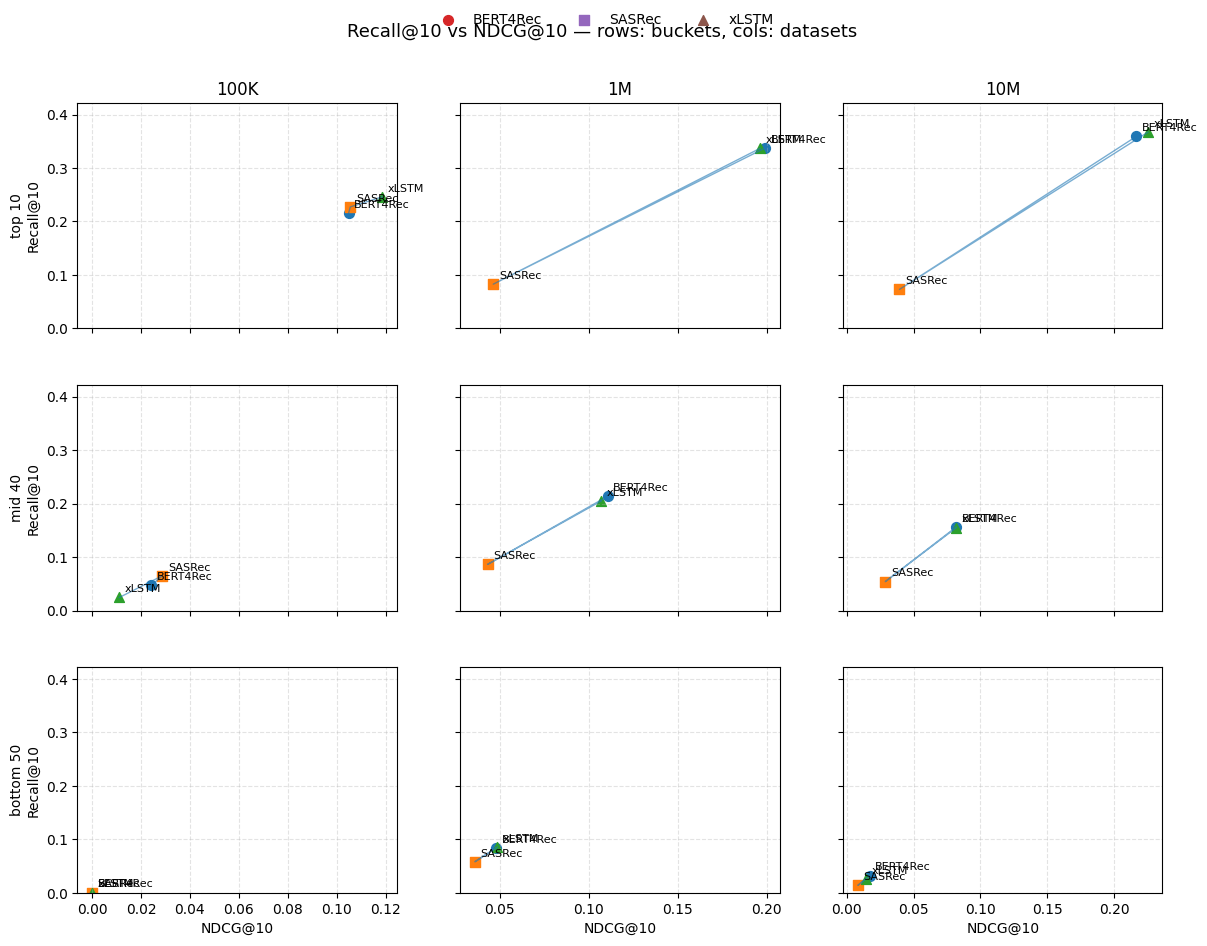

In [7]:
# 3x3 grid: rows = buckets, cols = datasets
# x-axis = NDCG@10, y-axis = Recall@10; points represent models
import matplotlib.pyplot as plt
import pandas as pd

# ---------------- data ----------------
rows = [
    # BERT4Rec
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2150,"MRR@10":0.0714,"NDCG@10":0.1048},
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0471,"MRR@10":0.0176,"NDCG@10":0.0243},
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3373,"MRR@10":0.1568,"NDCG@10":0.1991},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2139,"MRR@10":0.0797,"NDCG@10":0.1108},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0839,"MRR@10":0.0376,"NDCG@10":0.0482},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3589,"MRR@10":0.1728,"NDCG@10":0.2165},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1562,"MRR@10":0.0594,"NDCG@10":0.0818},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0321,"MRR@10":0.0128,"NDCG@10":0.0172},
    # SASRec
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2272,"MRR@10":0.0689,"NDCG@10":0.1055},
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0651,"MRR@10":0.0178,"NDCG@10":0.0287},
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0828,"MRR@10":0.0354,"NDCG@10":0.0465},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0863,"MRR@10":0.0303,"NDCG@10":0.0433},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0579,"MRR@10":0.0298,"NDCG@10":0.0362},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0730,"MRR@10":0.0293,"NDCG@10":0.0394},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0541,"MRR@10":0.0211,"NDCG@10":0.0288},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0138,"MRR@10":0.0066,"NDCG@10":0.0083},
    # xLSTM
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2460,"MRR@10":0.0806,"NDCG@10":0.1185},
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0246,"MRR@10":0.0072,"NDCG@10":0.0112},
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3369,"MRR@10":0.1536,"NDCG@10":0.1964},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2049,"MRR@10":0.0776,"NDCG@10":0.1071},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0855,"MRR@10":0.0377,"NDCG@10":0.0488},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3670,"MRR@10":0.1818,"NDCG@10":0.2253},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1551,"MRR@10":0.0600,"NDCG@10":0.0820},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0254,"MRR@10":0.0107,"NDCG@10":0.0141},
]
df = pd.DataFrame(rows)

dataset_order = ["100K", "1M", "10M"]
bucket_order  = ["top_10", "mid_40", "bottom_50"]
model_order   = ["BERT4Rec", "SASRec", "xLSTM"]
markers = {"BERT4Rec":"o", "SASRec":"s", "xLSTM":"^"}  # markers for models

# ---- figure ----
fig, axes = plt.subplots(3, 3, figsize=(14, 10), sharex='col', sharey=True)
fig.subplots_adjust(top=0.90, wspace=0.20, hspace=0.25)
fig.suptitle("Recall@10 vs NDCG@10 — rows: buckets, cols: datasets", fontsize=13)

# Global y-limit
ymax = df["Recall@10"].max()
for r, bucket in enumerate(bucket_order):
    for c, ds in enumerate(dataset_order):
        ax = axes[r, c]
        sub = df[(df["Dataset"] == ds) & (df["Bucket"] == bucket)].copy()
        # plot each model as a point; connect models for mild guidance (optional thin line)
        sub["Model"] = pd.Categorical(sub["Model"], categories=model_order, ordered=True)
        sub.sort_values("Model", inplace=True)
        ax.plot(sub["NDCG@10"], sub["Recall@10"], linewidth=1, alpha=0.6)
        for _, row in sub.iterrows():
            ax.scatter(row["NDCG@10"], row["Recall@10"], marker=markers[row["Model"]], s=50, label=row["Model"])
            ax.annotate(row["Model"], (row["NDCG@10"], row["Recall@10"]), textcoords="offset points", xytext=(4,4), fontsize=8)
        ax.set_ylim(0, ymax * 1.15)

        if r == 0:
            ax.set_title(ds)
        if c == 0:
            ax.set_ylabel(f"{bucket.replace('_',' ')}\nRecall@10")
        if r == 2:
            ax.set_xlabel("NDCG@10")
        ax.grid(True, linestyle="--", alpha=0.35)

# Build a shared legend for models
handles = []
labels = []
for m in model_order:
    handles.append(axes[0,0].scatter([], [], marker=markers[m], s=50))
    labels.append(m)
fig.legend(handles, labels, loc="upper center", ncol=3, frameon=False)

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/faceted_scatter_3x3.png'

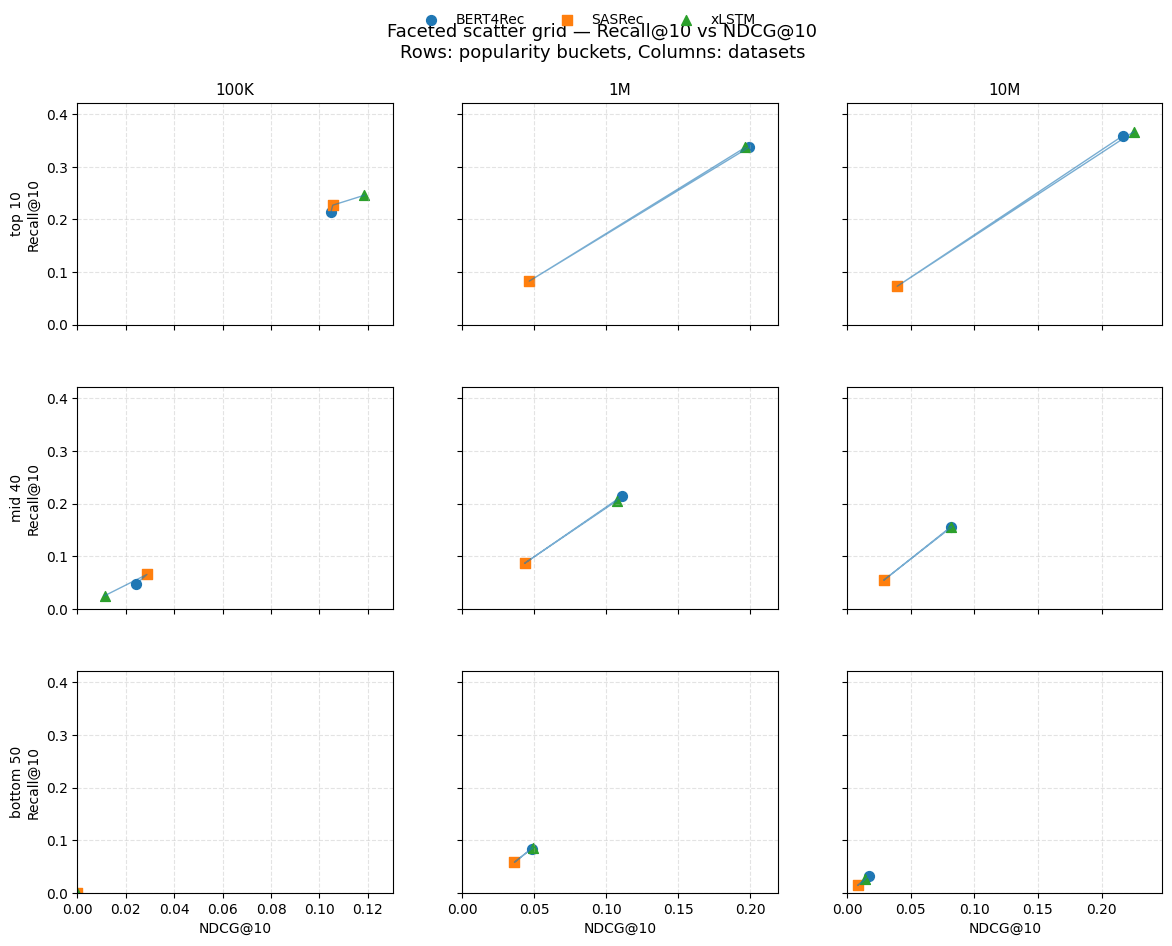

In [8]:
# Faceted scatter grid (3×3): rows=buckets, cols=datasets
# x = NDCG@10, y = Recall@10; points = models; consistent markers; shared legend; clean styling
import matplotlib.pyplot as plt
import pandas as pd

# ---------------- data ----------------
rows = [
    # BERT4Rec
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2150,"MRR@10":0.0714,"NDCG@10":0.1048},
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0471,"MRR@10":0.0176,"NDCG@10":0.0243},
    {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3373,"MRR@10":0.1568,"NDCG@10":0.1991},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2139,"MRR@10":0.0797,"NDCG@10":0.1108},
    {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0839,"MRR@10":0.0376,"NDCG@10":0.0482},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3589,"MRR@10":0.1728,"NDCG@10":0.2165},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1562,"MRR@10":0.0594,"NDCG@10":0.0818},
    {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0321,"MRR@10":0.0128,"NDCG@10":0.0172},
    # SASRec
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2272,"MRR@10":0.0689,"NDCG@10":0.1055},
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0651,"MRR@10":0.0178,"NDCG@10":0.0287},
    {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0828,"MRR@10":0.0354,"NDCG@10":0.0465},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0863,"MRR@10":0.0303,"NDCG@10":0.0433},
    {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0579,"MRR@10":0.0298,"NDCG@10":0.0362},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0730,"MRR@10":0.0293,"NDCG@10":0.0394},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0541,"MRR@10":0.0211,"NDCG@10":0.0288},
    {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0138,"MRR@10":0.0066,"NDCG@10":0.0083},
    # xLSTM
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2460,"MRR@10":0.0806,"NDCG@10":0.1185},
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0246,"MRR@10":0.0072,"NDCG@10":0.0112},
    {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3369,"MRR@10":0.1536,"NDCG@10":0.1964},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2049,"MRR@10":0.0776,"NDCG@10":0.1071},
    {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0855,"MRR@10":0.0377,"NDCG@10":0.0488},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3670,"MRR@10":0.1818,"NDCG@10":0.2253},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1551,"MRR@10":0.0600,"NDCG@10":0.0820},
    {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0254,"MRR@10":0.0107,"NDCG@10":0.0141},
]
df = pd.DataFrame(rows)

dataset_order = ["100K", "1M", "10M"]
bucket_order  = ["top_10", "mid_40", "bottom_50"]
model_order   = ["BERT4Rec", "SASRec", "xLSTM"]
markers = {"BERT4Rec":"o", "SASRec":"s", "xLSTM":"^"}  # markers for models

# ---- figure ----
fig, axes = plt.subplots(3, 3, figsize=(14, 10), sharex='col', sharey=True)
fig.subplots_adjust(top=0.90, wspace=0.22, hspace=0.28)
fig.suptitle("Faceted scatter grid — Recall@10 vs NDCG@10\nRows: popularity buckets, Columns: datasets", fontsize=13)

# Build a shared legend for models
legend_handles = []
legend_labels = []

# Global y-limit and x-limit per column for consistent scaling
ymax = df["Recall@10"].max() * 1.15
xmax_per_col = {
    ds: df[df["Dataset"] == ds]["NDCG@10"].max() * 1.10 for ds in dataset_order
}

for r, bucket in enumerate(bucket_order):
    for c, ds in enumerate(dataset_order):
        ax = axes[r, c]
        sub = df[(df["Dataset"] == ds) & (df["Bucket"] == bucket)].copy()
        sub["Model"] = pd.Categorical(sub["Model"], categories=model_order, ordered=True)
        sub.sort_values("Model", inplace=True)

        # connect models for gentle guidance (thin line)
        ax.plot(sub["NDCG@10"], sub["Recall@10"], linewidth=1, alpha=0.6)

        # scatter per model with consistent markers
        for _, row in sub.iterrows():
            sc = ax.scatter(row["NDCG@10"], row["Recall@10"], marker=markers[row["Model"]], s=50, label=row["Model"])
            # collect one handle per model for the shared legend
            if (row["Model"] not in legend_labels):
                legend_handles.append(sc)
                legend_labels.append(row["Model"])

        # axes cosmetics
        ax.grid(True, linestyle="--", alpha=0.35)
        ax.set_ylim(0, ymax)
        ax.set_xlim(0, xmax_per_col[ds])

        if r == 0:
            ax.set_title(ds, pad=6, fontsize=11)
        if c == 0:
            ax.set_ylabel(f"{bucket.replace('_',' ')}\nRecall@10", fontsize=10)
        if r == len(bucket_order)-1:
            ax.set_xlabel("NDCG@10", fontsize=10)

# shared legend on top
fig.legend(legend_handles, legend_labels, loc="upper center", ncol=len(model_order), frameon=False)

# Save to file for download if needed
out_path = "/mnt/data/faceted_scatter_3x3.png"
plt.savefig(out_path, bbox_inches="tight", dpi=160)
plt.show()

out_path


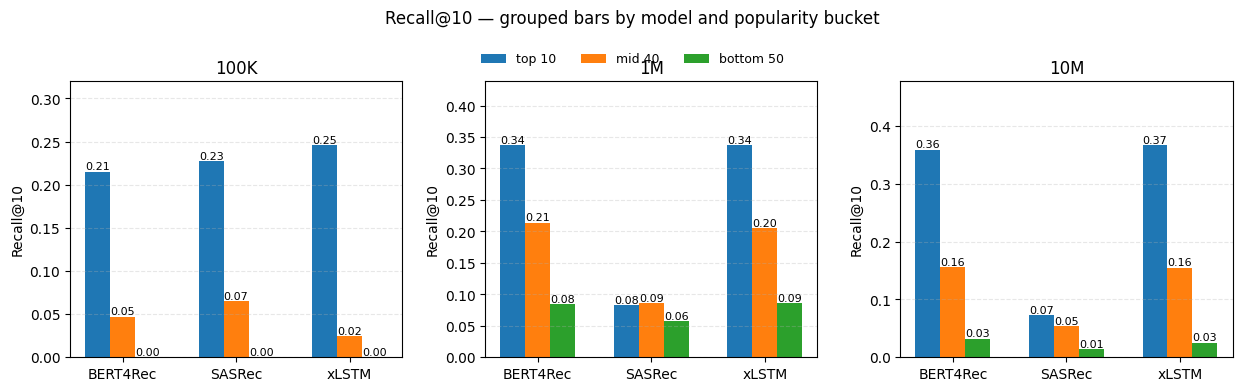

In [11]:
# Grouped bar chart for Recall@10 only (no NDCG, no lines)
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure /mnt/data exists to avoid FileNotFoundError
os.makedirs("/mnt/data", exist_ok=True)

# If df isn't defined in this kernel, reconstruct it quickly
if 'df' not in globals():
    rows = [
        # BERT4Rec
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2150,"MRR@10":0.0714,"NDCG@10":0.1048},
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0471,"MRR@10":0.0176,"NDCG@10":0.0243},
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3373,"MRR@10":0.1568,"NDCG@10":0.1991},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2139,"MRR@10":0.0797,"NDCG@10":0.1108},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0839,"MRR@10":0.0376,"NDCG@10":0.0482},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3589,"MRR@10":0.1728,"NDCG@10":0.2165},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1562,"MRR@10":0.0594,"NDCG@10":0.0818},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0321,"MRR@10":0.0128,"NDCG@10":0.0172},
        # SASRec
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2272,"MRR@10":0.0689,"NDCG@10":0.1055},
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0651,"MRR@10":0.0178,"NDCG@10":0.0287},
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0828,"MRR@10":0.0354,"NDCG@10":0.0465},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0863,"MRR@10":0.0303,"NDCG@10":0.0433},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0579,"MRR@10":0.0298,"NDCG@10":0.0362},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0730,"MRR@10":0.0293,"NDCG@10":0.0394},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0541,"MRR@10":0.0211,"NDCG@10":0.0288},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0138,"MRR@10":0.0066,"NDCG@10":0.0083},
        # xLSTM
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2460,"MRR@10":0.0806,"NDCG@10":0.1185},
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0246,"MRR@10":0.0072,"NDCG@10":0.0112},
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3369,"MRR@10":0.1536,"NDCG@10":0.1964},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2049,"MRR@10":0.0776,"NDCG@10":0.1071},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0855,"MRR@10":0.0377,"NDCG@10":0.0488},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3670,"MRR@10":0.1818,"NDCG@10":0.2253},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1551,"MRR@10":0.0600,"NDCG@10":0.0820},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0254,"MRR@10":0.0107,"NDCG@10":0.0141},
    ]
    df = pd.DataFrame(rows)

dataset_order = ["100K", "1M", "10M"]
model_order   = ["BERT4Rec", "SASRec", "xLSTM"]
bucket_order  = ["top_10", "mid_40", "bottom_50"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.subplots_adjust(top=0.80, wspace=0.25)
fig.suptitle("Recall@10 — grouped bars by model and popularity bucket", y=0.98, fontsize=12)

for i, ds in enumerate(dataset_order):
    ax = axes[i]
    sub = df[df["Dataset"] == ds].copy()
    sub["Model"] = pd.Categorical(sub["Model"], categories=model_order, ordered=True)
    sub["Bucket"] = pd.Categorical(sub["Bucket"], categories=bucket_order, ordered=True)
    sub.sort_values(["Model","Bucket"], inplace=True)

    x = np.arange(len(model_order))
    width = 0.22
    offsets = np.linspace(-width, width, num=len(bucket_order), endpoint=True)

    for j, bucket in enumerate(bucket_order):
        dd = sub[sub["Bucket"] == bucket]
        ax.bar(x + offsets[j], dd["Recall@10"].to_numpy(), width=width, label=bucket.replace("_"," ") if i==0 else None)

        # optionally annotate bar values
        for xi, val in zip(x + offsets[j], dd["Recall@10"].to_numpy()):
            ax.text(xi, val, f"{val:.2f}", ha='center', va='bottom', fontsize=8, rotation=0)

    ax.set_title(ds, pad=6)
    ax.set_xticks(x)
    ax.set_xticklabels(model_order, rotation=0)
    ax.set_ylim(0, sub["Recall@10"].max()*1.30)
    ax.set_ylabel("Recall@10")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

# shared legend for buckets
fig.legend([axes[0].containers[0], axes[0].containers[1], axes[0].containers[2]],
           [b.replace("_"," ") for b in bucket_order],
           loc="upper center", bbox_to_anchor=(0.5, 0.90), ncol=3, frameon=False, fontsize=9)

out_path = "/mnt/data/grouped_bar_recall_only.png"
plt.savefig(out_path, bbox_inches="tight", dpi=160)
plt.show()

# out_path


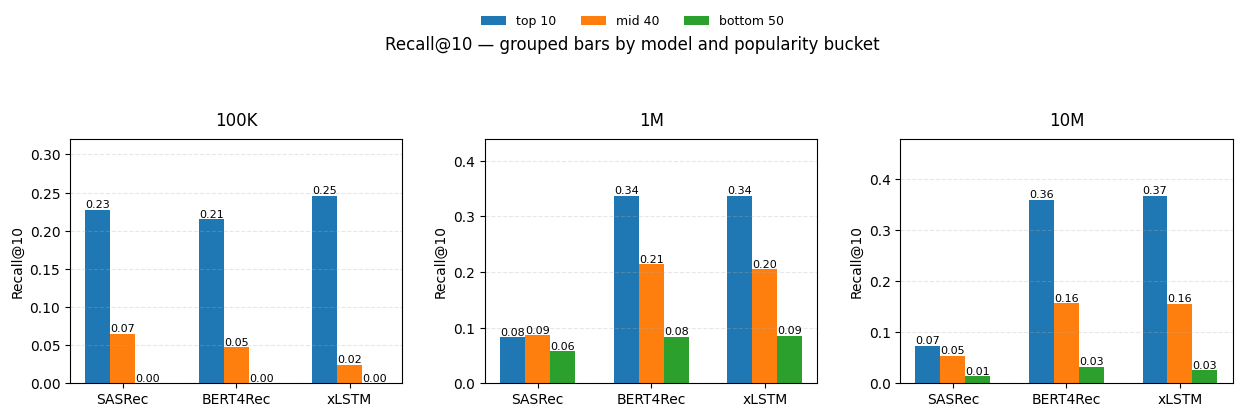

'/mnt/data/grouped_bar_recall_only_ordered.png'

In [14]:
# Updated grouped bar chart per your requests:
# 1) Model order: SASRec, BERT4Rec, xLSTM
# 2) Extra spacing between the legend ("explainer") and the charts to avoid overlap

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

os.makedirs("/mnt/data", exist_ok=True)

# If df isn't defined, reconstruct it (keeps your same values)
if 'df' not in globals():
    rows = [
        # BERT4Rec
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2150,"MRR@10":0.0714,"NDCG@10":0.1048},
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0471,"MRR@10":0.0176,"NDCG@10":0.0243},
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3373,"MRR@10":0.1568,"NDCG@10":0.1991},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2139,"MRR@10":0.0797,"NDCG@10":0.1108},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0839,"MRR@10":0.0376,"NDCG@10":0.0482},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3589,"MRR@10":0.1728,"NDCG@10":0.2165},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1562,"MRR@10":0.0594,"NDCG@10":0.0818},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0321,"MRR@10":0.0128,"NDCG@10":0.0172},
        # SASRec
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2272,"MRR@10":0.0689,"NDCG@10":0.1055},
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0651,"MRR@10":0.0178,"NDCG@10":0.0287},
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0828,"MRR@10":0.0354,"NDCG@10":0.0465},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0863,"MRR@10":0.0303,"NDCG@10":0.0433},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0579,"MRR@10":0.0298,"NDCG@10":0.0362},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0730,"MRR@10":0.0293,"NDCG@10":0.0394},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0541,"MRR@10":0.0211,"NDCG@10":0.0288},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0138,"MRR@10":0.0066,"NDCG@10":0.0083},
        # xLSTM
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2460,"MRR@10":0.0806,"NDCG@10":0.1185},
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0246,"MRR@10":0.0072,"NDCG@10":0.0112},
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3369,"MRR@10":0.1536,"NDCG@10":0.1964},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2049,"MRR@10":0.0776,"NDCG@10":0.1071},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0855,"MRR@10":0.0377,"NDCG@10":0.0488},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3670,"MRR@10":0.1818,"NDCG@10":0.2253},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1551,"MRR@10":0.0600,"NDCG@10":0.0820},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0254,"MRR@10":0.0107,"NDCG@10":0.0141},
    ]
    df = pd.DataFrame(rows)

dataset_order = ["100K", "1M", "10M"]
model_order   = ["SASRec", "BERT4Rec", "xLSTM"]   # <-- requested order
bucket_order  = ["top_10", "mid_40", "bottom_50"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Add more headroom under the legend so it doesn't overlap titles
fig.subplots_adjust(top=0.72, wspace=0.25)
fig.suptitle("Recall@10 — grouped bars by model and popularity bucket", y=0.98, fontsize=12)

for i, ds in enumerate(dataset_order):
    ax = axes[i]
    sub = df[df["Dataset"] == ds].copy()
    sub["Model"] = pd.Categorical(sub["Model"], categories=model_order, ordered=True)
    sub["Bucket"] = pd.Categorical(sub["Bucket"], categories=bucket_order, ordered=True)
    sub.sort_values(["Model","Bucket"], inplace=True)

    x = np.arange(len(model_order))
    width = 0.22
    offsets = np.linspace(-width, width, num=len(bucket_order), endpoint=True)

    for j, bucket in enumerate(bucket_order):
        dd = sub[sub["Bucket"] == bucket]
        bars = ax.bar(x + offsets[j], dd["Recall@10"].to_numpy(), width=width, label=bucket.replace("_"," ") if i==0 else None)
        for xi, val in zip(x + offsets[j], dd["Recall@10"].to_numpy()):
            ax.text(xi, val, f"{val:.2f}", ha='center', va='bottom', fontsize=8)

    ax.set_title(ds, pad=10)  # a bit more padding below legend
    ax.set_xticks(x)
    ax.set_xticklabels(model_order, rotation=0)
    ax.set_ylim(0, sub["Recall@10"].max()*1.30)
    ax.set_ylabel("Recall@10")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

# Place legend higher and centered, leaving extra gap to charts
fig.legend(
    [axes[0].containers[0], axes[0].containers[1], axes[0].containers[2]],
    [b.replace("_"," ") for b in bucket_order],
    loc="upper center", bbox_to_anchor=(0.5, 1.06), ncol=3, frameon=False, fontsize=9
)

out_path = "/mnt/data/grouped_bar_recall_only_ordered.png"
plt.savefig(out_path, bbox_inches="tight", dpi=160)
plt.show()

out_path


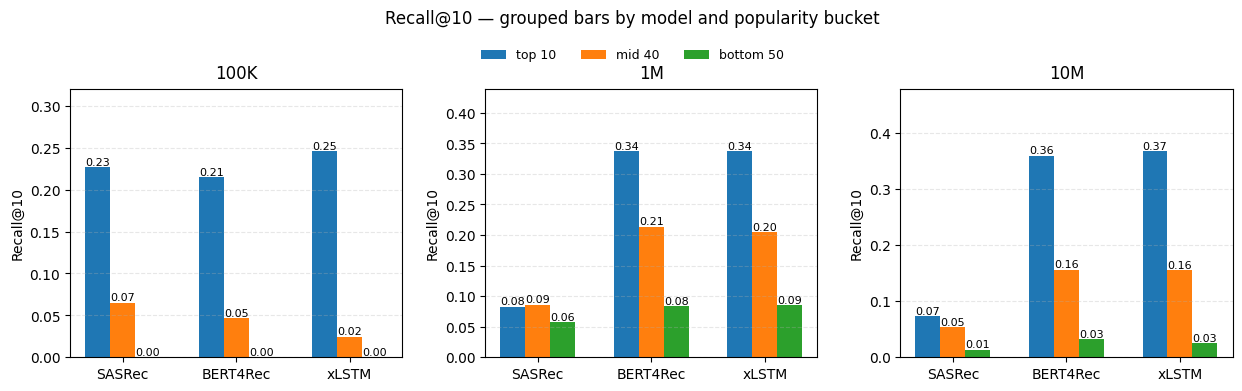

'/mnt/data/grouped_bar_recall_only_title_top.png'

In [15]:
# Fix: correct Categorical categories keyword usage and re-render
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

os.makedirs("/mnt/data", exist_ok=True)

# Rebuild df if missing
if 'df' not in globals():
    rows = [
        # BERT4Rec
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2150,"MRR@10":0.0714,"NDCG@10":0.1048},
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0471,"MRR@10":0.0176,"NDCG@10":0.0243},
        {"Model":"BERT4Rec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3373,"MRR@10":0.1568,"NDCG@10":0.1991},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2139,"MRR@10":0.0797,"NDCG@10":0.1108},
        {"Model":"BERT4Rec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0839,"MRR@10":0.0376,"NDCG@10":0.0482},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3589,"MRR@10":0.1728,"NDCG@10":0.2165},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1562,"MRR@10":0.0594,"NDCG@10":0.0818},
        {"Model":"BERT4Rec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0321,"MRR@10":0.0128,"NDCG@10":0.0172},
        # SASRec
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2272,"MRR@10":0.0689,"NDCG@10":0.1055},
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0651,"MRR@10":0.0178,"NDCG@10":0.0287},
        {"Model":"SASRec","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0828,"MRR@10":0.0354,"NDCG@10":0.0465},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0863,"MRR@10":0.0303,"NDCG@10":0.0433},
        {"Model":"SASRec","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0579,"MRR@10":0.0298,"NDCG@10":0.0362},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.0730,"MRR@10":0.0293,"NDCG@10":0.0394},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0541,"MRR@10":0.0211,"NDCG@10":0.0288},
        {"Model":"SASRec","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0138,"MRR@10":0.0066,"NDCG@10":0.0083},
        # xLSTM
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"top_10","Recall@10":0.2460,"MRR@10":0.0806,"NDCG@10":0.1185},
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"mid_40","Recall@10":0.0246,"MRR@10":0.0072,"NDCG@10":0.0112},
        {"Model":"xLSTM","Dataset":"100K","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0000,"MRR@10":0.0000,"NDCG@10":0.0000},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3369,"MRR@10":0.1536,"NDCG@10":0.1964},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.2049,"MRR@10":0.0776,"NDCG@10":0.1071},
        {"Model":"xLSTM","Dataset":"1M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0855,"MRR@10":0.0377,"NDCG@10":0.0488},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"top_10","Recall@10":0.3670,"MRR@10":0.1818,"NDCG@10":0.2253},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"mid_40","Recall@10":0.1551,"MRR@10":0.0600,"NDCG@10":0.0820},
        {"Model":"xLSTM","Dataset":"10M","Seq Len":128,"Bucket":"bottom_50","Recall@10":0.0254,"MRR@10":0.0107,"NDCG@10":0.0141},
    ]
    df = pd.DataFrame(rows)

dataset_order = ["100K", "1M", "10M"]
model_order   = ["SASRec", "BERT4Rec", "xLSTM"]
bucket_order  = ["top_10", "mid_40", "bottom_50"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.subplots_adjust(top=0.78, wspace=0.25)
fig.suptitle("Recall@10 — grouped bars by model and popularity bucket", y=0.98, fontsize=12)

for i, ds in enumerate(dataset_order):
    ax = axes[i]
    sub = df[df["Dataset"] == ds].copy()
    sub["Model"] = pd.Categorical(sub["Model"], categories=model_order, ordered=True)
    sub["Bucket"] = pd.Categorical(sub["Bucket"], categories=bucket_order, ordered=True)  # <- fixed
    sub.sort_values(["Model","Bucket"], inplace=True)

    x = np.arange(len(model_order))
    width = 0.22
    offsets = np.linspace(-width, width, num=len(bucket_order), endpoint=True)

    for j, bucket in enumerate(bucket_order):
        dd = sub[sub["Bucket"] == bucket]
        ax.bar(x + offsets[j], dd["Recall@10"].to_numpy(), width=width, label=bucket.replace("_"," ") if i==0 else None)
        for xi, val in zip(x + offsets[j], dd["Recall@10"].to_numpy()):
            ax.text(xi, val, f"{val:.2f}", ha='center', va='bottom', fontsize=8)

    ax.set_title(ds, pad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(model_order, rotation=0)
    ax.set_ylim(0, sub["Recall@10"].max()*1.30)
    ax.set_ylabel("Recall@10")
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

# Legend below title, above plots
fig.legend(
    [axes[0].containers[0], axes[0].containers[1], axes[0].containers[2]],
    [b.replace("_"," ") for b in bucket_order],
    loc="upper center", bbox_to_anchor=(0.5, 0.91), ncol=3, frameon=False, fontsize=9
)

out_path = "/mnt/data/grouped_bar_recall_only_title_top.png"
plt.savefig(out_path, bbox_inches="tight", dpi=160)
plt.show()

out_path
